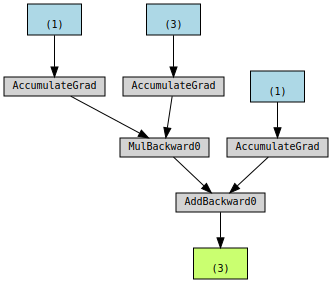

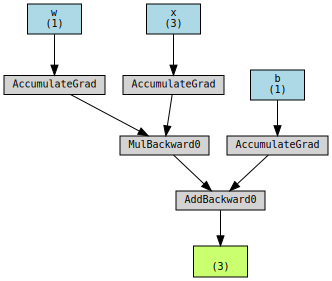

In [11]:
# First make sure you have the required packages
# !pip install torchviz graphviz

import torch
from torchviz import make_dot
from IPython.display import display


# Simple network: y = wx + b
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
w = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)

# Forward pass
y = w * x + b

# Visualize computation for y
dot = make_dot(y)
display(dot)

# Or visualize with parameter names
dot = make_dot(y, params={"w": w, "b": b, "x": x})
display(dot)

Epoch 100/1000, Loss: 2.0327
Epoch 200/1000, Loss: 1.8864
Epoch 300/1000, Loss: 1.8384
Epoch 400/1000, Loss: 1.8226
Epoch 500/1000, Loss: 1.8174
Epoch 600/1000, Loss: 1.8157
Epoch 700/1000, Loss: 1.8151
Epoch 800/1000, Loss: 1.8149
Epoch 900/1000, Loss: 1.8148
Epoch 1000/1000, Loss: 1.8148

True parameters - Bias: 2.0000, Weight: 3.0000
Learned parameters - Bias: 2.3168, Weight: 2.9319


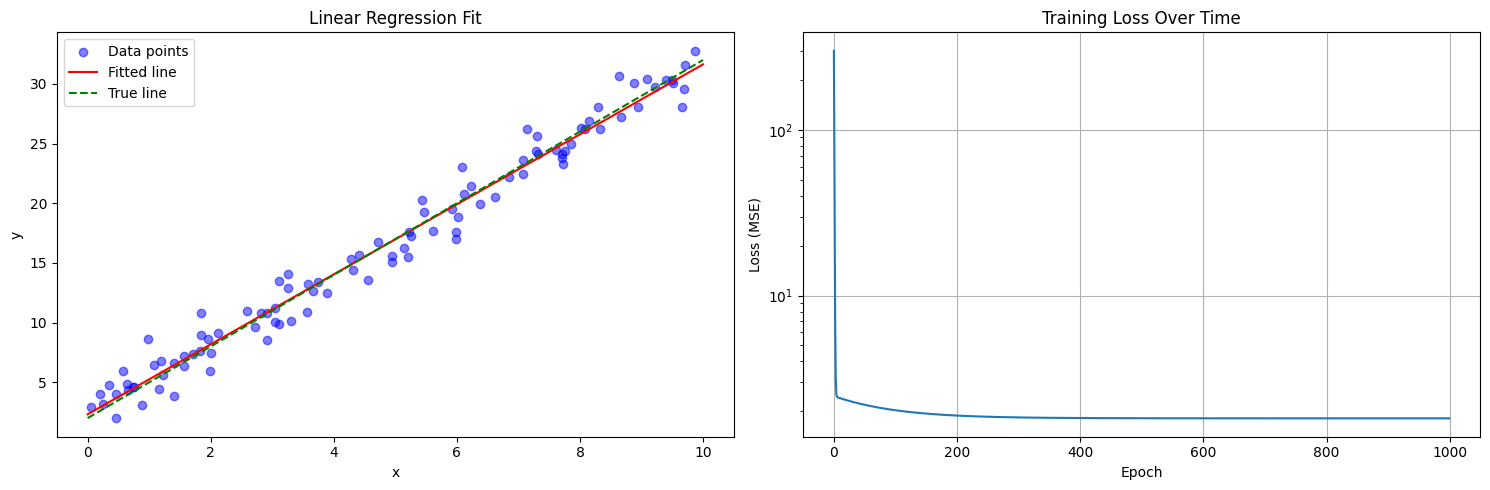

In [12]:
# Optimizers
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x = np.random.rand(100, 1) * 10
true_b = 2
true_w = 3
y = true_w * x + true_b + np.random.randn(100, 1) * 1.5

# Convert to PyTorch tensors
x_train_tensor = torch.from_numpy(x).float()
y_train_tensor = torch.from_numpy(y).float()

# Set random seed for reproducibility
torch.manual_seed(42)

# Hyperparameters
learning_rate = 0.01  # Reduced learning rate for stability
n_epochs = 1000

# Initialize parameters with random values
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Initialize SGD optimizer
optimizer = optim.SGD([b, w], lr=learning_rate)

# Lists to store loss history
loss_history = []

# Training loop
for epoch in range(n_epochs):
    # Step 1: Forward pass - compute predictions
    y_pred = b + w * x_train_tensor

    # Step 2: Compute loss
    error = y_pred - y_train_tensor
    loss = (error ** 2).mean()

    # Store loss history
    loss_history.append(loss.item())

    # Step 3: Backward pass - compute gradients
    loss.backward()

    # Step 4: Update parameters using optimizer
    optimizer.step()

    # Reset gradients for next iteration
    optimizer.zero_grad()

    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item():.4f}')

# Print final parameters
print(f"\nTrue parameters - Bias: {true_b:.4f}, Weight: {true_w:.4f}")
print(f"Learned parameters - Bias: {b.item():.4f}, Weight: {w.item():.4f}")

# Plotting
plt.figure(figsize=(15, 5))

# Plot 1: Data and fitted line
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', alpha=0.5, label='Data points')
x_range = np.linspace(0, 10, 100)
y_pred = w.item() * x_range + b.item()
plt.plot(x_range, y_pred, color='red', label='Fitted line')
plt.plot(x_range, true_w * x_range + true_b, '--', color='green', label='True line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

# Plot 2: Loss history
plt.subplot(1, 2, 2)
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss Over Time')
plt.yscale('log')
plt.grid(True)

plt.tight_layout()
plt.show()

In [13]:

# Manual vs Optimizer Gradient Descent
import torch
import torch.optim as optim

# Generate simple data
x = torch.linspace(0, 10, 100)
y = 2 * x + 3 + torch.randn(100) * 0.5

# Example 1: Manual Gradient Descent
b1 = torch.randn(1, requires_grad=True)
w1 = torch.randn(1, requires_grad=True)
learning_rate = 0.01

# One iteration of manual gradient descent
y_pred = b1 + w1 * x
loss = ((y_pred - y) ** 2).mean()
loss.backward()

# Manual parameter update
with torch.no_grad():  # Tell PyTorch not to track gradients during update
    b1 -= learning_rate * b1.grad  # Manually apply gradient step
    w1 -= learning_rate * w1.grad  # Manually apply gradient step

# Manual gradient zero
b1.grad.zero_()
w1.grad.zero_()

# Example 2: Using Optimizer
b2 = torch.randn(1, requires_grad=True)
w2 = torch.randn(1, requires_grad=True)

# Create optimizer
optimizer = optim.SGD([b2, w2], lr=learning_rate)

# One iteration with optimizer
y_pred = b2 + w2 * x
loss = ((y_pred - y) ** 2).mean()
loss.backward()

# Optimizer update - handles everything in one line!
optimizer.step()    # Applies gradients using learning rate
optimizer.zero_grad()  # Resets gradients

In [14]:
# Loss functions
import torch
import torch.nn as nn

# Define a MSE loss functino
loss_fn = nn.MSELoss(reduction="mean") # higher order function


# This is a random example to illustrate the loss function
predictions = torch.tensor([0.5, 1.0])
labels = torch.tensor([2.0, 1.3])
print(loss_fn(predictions, labels))

tensor(1.1700)


In [15]:
loss.detach().cpu().numpy()

array(39.792442, dtype=float32)

In [16]:
loss.item(), loss.tolist()

(39.792442321777344, 39.792442321777344)